<a href="https://colab.research.google.com/github/Heather-bu/bme3053c/blob/main/midterm_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your goal is to recreate a neural network from scratch and train it on the MNIST dataset! You are free to use Cursor to assist you with this assignment.





Part 1:

Follow the steps in the first link below to compute the forward and backward passes of the neural network. Use the 2nd link to assist you with this task (look at the last cell). Use the same weights and inputs and print out the new weights connected to the hidden and output layers. (You should print the exact weight values computed in the first link)

 https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/Links to an external site.

https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-02/lesson-02.solutions.ipynbLinks to an external site.

Part 2:

Create a neural network using Numpy and train it on the MNIST dataset. (Cursor will assist you)

Evaluate the accuracy and F1 scores for each of the 10 digits. Use figures to visualize your results.

#

In [9]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Initialize the network with the same weights from the example
def initialize_network():
    network = {
        'h1': {'w1': 0.15, 'w2': 0.20, 'b': 0.35},
        'h2': {'w1': 0.25, 'w2': 0.30, 'b': 0.35},
        'o1': {'w1': 0.40, 'w2': 0.45, 'b': 0.60},
        'o2': {'w1': 0.50, 'w2': 0.55, 'b': 0.60}
    }
    return network

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Forward pass
def forward_pass(network, inputs):
    # Hidden layer
    h1_input = network['h1']['w1'] * inputs[0] + network['h1']['w2'] * inputs[1] + network['h1']['b']
    h1_output = sigmoid(h1_input)

    h2_input = network['h2']['w1'] * inputs[0] + network['h2']['w2'] * inputs[1] + network['h2']['b']
    h2_output = sigmoid(h2_input)

    # Output layer
    o1_input = network['o1']['w1'] * h1_output + network['o1']['w2'] * h2_output + network['o1']['b']
    o1_output = sigmoid(o1_input)

    o2_input = network['o2']['w1'] * h1_output + network['o2']['w2'] * h2_output + network['o2']['b']
    o2_output = sigmoid(o2_input)

    return (h1_output, h2_output), (o1_output, o2_output)

# Backward pass
def backward_pass(network, inputs, hidden_outputs, final_outputs, targets):
    learning_rate = 0.5
    h1_output, h2_output = hidden_outputs
    o1_output, o2_output = final_outputs

    # Output layer errors
    o1_error = -(targets[0] - o1_output) * sigmoid_derivative(o1_output)
    o2_error = -(targets[1] - o2_output) * sigmoid_derivative(o2_output)

    # Hidden layer errors
    h1_error = (network['o1']['w1'] * o1_error + network['o2']['w1'] * o2_error) * sigmoid_derivative(h1_output)
    h2_error = (network['o1']['w2'] * o1_error + network['o2']['w2'] * o2_error) * sigmoid_derivative(h2_output)

    # Update output layer weights
    network['o1']['w1'] -= learning_rate * o1_error * h1_output
    network['o1']['w2'] -= learning_rate * o1_error * h2_output
    network['o2']['w1'] -= learning_rate * o2_error * h1_output
    network['o2']['w2'] -= learning_rate * o2_error * h2_output

    # Update hidden layer weights
    network['h1']['w1'] -= learning_rate * h1_error * inputs[0]
    network['h1']['w2'] -= learning_rate * h1_error * inputs[1]
    network['h2']['w1'] -= learning_rate * h2_error * inputs[0]
    network['h2']['w2'] -= learning_rate * h2_error * inputs[1]

    return network

# Run the example
network = initialize_network()
inputs = [0.05, 0.10]
targets = [0.01, 0.99]

# Forward pass
hidden_outputs, final_outputs = forward_pass(network, inputs)
print("Initial outputs:", final_outputs)

# Backward pass
network = backward_pass(network, inputs, hidden_outputs, final_outputs, targets)

# Print updated weights
print("\nUpdated weights:")
print("Hidden layer:")
print(f"w1_h1: {network['h1']['w1']:.8f}")
print(f"w2_h1: {network['h1']['w2']:.8f}")
print(f"w1_h2: {network['h2']['w1']:.8f}")
print(f"w2_h2: {network['h2']['w2']:.8f}")
print("\nOutput layer:")
print(f"w1_o1: {network['o1']['w1']:.8f}")
print(f"w2_o1: {network['o1']['w2']:.8f}")
print(f"w1_o2: {network['o2']['w1']:.8f}")
print(f"w2_o2: {network['o2']['w2']:.8f}")

Initial outputs: (0.7513650695523157, 0.7729284653214625)

Updated weights:
Hidden layer:
w1_h1: 0.14978072
w2_h1: 0.19956143
w1_h2: 0.24975114
w2_h2: 0.29950229

Output layer:
w1_o1: 0.35891648
w2_o1: 0.40866619
w1_o2: 0.51130127
w2_o2: 0.56137012


Epoch 1/10, Accuracy: 0.7750
Epoch 2/10, Accuracy: 0.8592
Epoch 3/10, Accuracy: 0.8864
Epoch 4/10, Accuracy: 0.8954
Epoch 5/10, Accuracy: 0.9034
Epoch 6/10, Accuracy: 0.9094
Epoch 7/10, Accuracy: 0.9129
Epoch 8/10, Accuracy: 0.9171
Epoch 9/10, Accuracy: 0.9201
Epoch 10/10, Accuracy: 0.9236


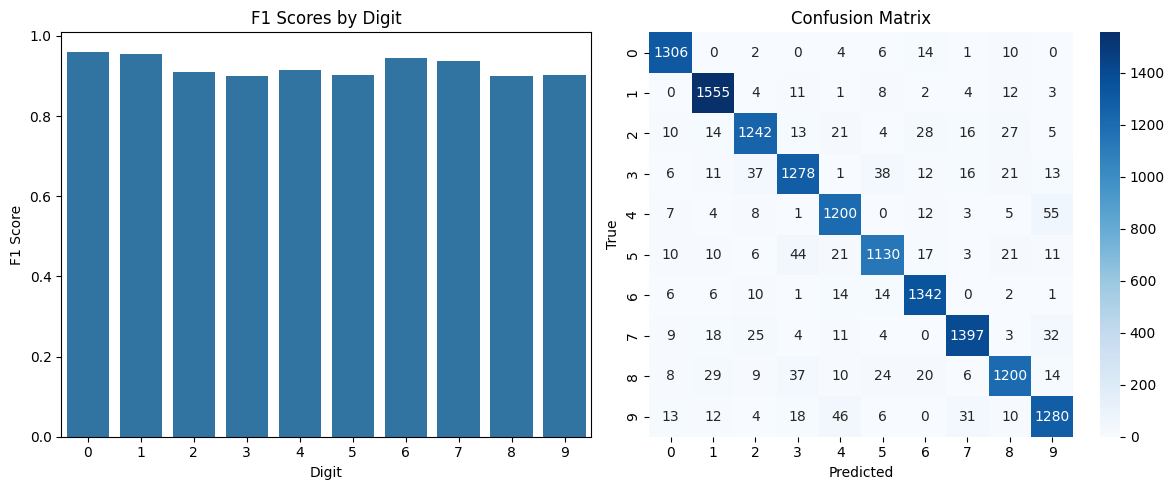


Overall Accuracy: 0.9236

F1 Scores by digit:
Digit 0: 0.9610
Digit 1: 0.9543
Digit 2: 0.9109
Digit 3: 0.9000
Digit 4: 0.9146
Digit 5: 0.9015
Digit 6: 0.9441
Digit 7: 0.9376
Digit 8: 0.8996
Digit 9: 0.9033


In [10]:
# Part 2: Neural Network for MNIST

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.w1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate=0.1):
        m = X.shape[0]

        # Backward propagation
        dz2 = self.a2 - y
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = np.dot(dz2, self.w2.T) * sigmoid_derivative(self.a1)
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Update parameters
        self.w2 -= learning_rate * dw2
        self.b2 -= learning_rate * db2
        self.w1 -= learning_rate * dw1
        self.b1 -= learning_rate * db1

# Load and preprocess MNIST data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # Normalize pixel values

# Convert labels to one-hot encoding
y_onehot = np.zeros((y.shape[0], 10))
for i in range(y.shape[0]):
    y_onehot[i, int(y[i])] = 1

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Initialize and train the network
nn = NeuralNetwork(input_size=784, hidden_size=128, output_size=10)

# Training loop
epochs = 10
batch_size = 128
n_batches = len(X_train) // batch_size

for epoch in range(epochs):
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size

        X_batch = X_train[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]

        # Forward and backward passes
        predictions = nn.forward(X_batch)
        nn.backward(X_batch, y_batch)

    # Print training progress
    if epoch % 1 == 0:
        predictions = nn.forward(X_test)
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = np.argmax(y_test, axis=1)
        accuracy = accuracy_score(true_labels, predicted_labels)
        print(f"Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy:.4f}")

# Evaluate model performance
predictions = nn.forward(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calculate accuracy and F1 scores for each digit
accuracy = accuracy_score(true_labels, predicted_labels)
f1_scores = [f1_score(true_labels == i, predicted_labels == i) for i in range(10)]

# Visualize results
plt.figure(figsize=(12, 5))

# Plot F1 scores
plt.subplot(1, 2, 1)
sns.barplot(x=range(10), y=f1_scores)
plt.title('F1 Scores by Digit')
plt.xlabel('Digit')
plt.ylabel('F1 Score')

# Plot confusion matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

# Print overall accuracy and F1 scores
print(f"\nOverall Accuracy: {accuracy:.4f}")
print("\nF1 Scores by digit:")
for digit, f1 in enumerate(f1_scores):
    print(f"Digit {digit}: {f1:.4f}")